In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import data
df_train = pd.read_csv("train.csv", index_col="Id") 
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [4]:
df_test = pd.read_csv('test.csv', index_col='Id')
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [6]:
df = df_train.append(df_test) # merge train and test data
df.shape

(2919, 80)

In [31]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [7]:
df_vars = df.iloc[:,:-1] #todas las filas, y todas las columnas menos la última
df_outcome = df.iloc[:,-1] #todas las filas y la última columna

In [8]:
df.isnull().sum() #valores nulos de cada columna

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

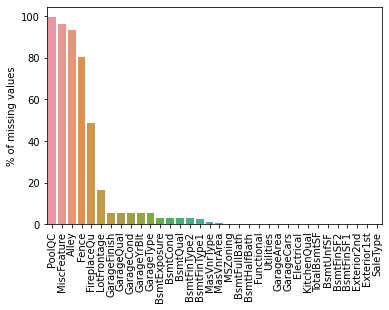

In [9]:
#eliminate columns with more than 50% of missing values
def missing_values_barplot(df):
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / df.shape[0]) * 100 #df.shape[0] es el número de filas
    missing_table = pd.concat([missing_count, missing_percentage], axis=1)
    missing_table.rename(columns = {0:"Missing Values", 1:"Percentage"}, inplace=True)
    final_table = missing_table[missing_table["Missing Values"] != 0].sort_values(by = "Missing Values", ascending=False)
    #previous line removes columns without missing values, and sorts the rest by missing_count
    sns.barplot(x=final_table.index, y="Percentage", data=final_table)
    plt.xticks(rotation=90)
    plt.ylabel("% of missing values")
    plt.show()
    
missing_values_barplot(df_vars)

In [10]:
#drop columns (we choose the ones with more than 50% missing data by hand)
df_vars.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu"], axis=1, inplace=True)
df_vars.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
                ... 
HeatingQC          0
CentralAir         0
1stFlrSF           0
2ndFlrSF           0
SaleCondition      0
Length: 74, dtype: int64

In [11]:
#create imputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import TransformerMixin
from sklearn.impute import SimpleImputer

class MyImputer(TransformerMixin):
    def __init__(self, col_names):
        self.col_names = col_names
        self.models = [0] * len(col_names)
    
    def get_params(self, deep=True):
    # suppose this estimator has parameters "alpha" and "recursive"
        return {"col_names": self.col_names}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def fit(self, X, y=None):
        for i, col in enumerate(self.col_names):
            temp = X[~X[col].isnull()].dropna() #filters null values, and then removes missing values (NA, missing, etc.)
            if temp.shape[0] > 0: #if there are non-missing values
                X_temp = temp.drop([col], axis=1) # keep all columns but the current one
                y_temp = temp[col] #the current column
                rfr = RandomForestRegressor(random_state=42)
                rfr_fitted = rfr.fit(X_temp, y_temp)
                self.models[i] = rfr_fitted #forest generated for current column
            else:
                self.models[i] = null
        return self 

    def transform(self, X, y=None):
        Xs = X
        for i, col in enumerate(self.col_names):
            temp = X[X[col].isnull()] # rows where the current column is null
            X_temp = temp.drop([col], axis=1) # delete current column from the rows where the current column is null
            try:
                if len(X_temp) > 0:
                    si = SimpleImputer(strategy='median') # will replace missing values with the median of the rest
                    si.fit(X_temp) # X_temp now has no missing values, only null ones
                    X_impute = si.transform(X_temp) # df with imputed values
                    preds = self.models[i].predict(X_impute) # use model that doesn't consider current column to gen. prediction
                    Xs.loc[X[col].isnull(), col] = preds.reshape(-1,1) # fills the null values of the current column with the predictions
            except:
                print(X_temp.shape)
        return Xs

In [12]:
df_vars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [13]:
#change objects to category and classify by dtypes
cat_cols = []
num_cols = []

for col in df_vars.columns:
    if df_vars[col].dtype == 'object': # column is categorical
        df_vars = df_vars.astype({f"{col}":"category"}) # cast to pandas category data type
        cat_cols.append(col)
    else:
        num_cols.append(col)

print("{0} categorical columns: \n {1} \n".format(len(cat_cols),cat_cols))
print("{0} numerical columns: \n {1} \n".format(len(num_cols), num_cols))

38 categorical columns: 
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

36 numerical columns: 
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorc

In [14]:
#transform columns 
from sklearn.compose import ColumnTransformer
# uses imputer we defined for numerical columns, default imputer for categorical columns
transformer = ColumnTransformer([('num', MyImputer(col_names=num_cols), num_cols),('cat', SimpleImputer(strategy="most_frequent"), cat_cols)])
preprocessed = pd.DataFrame(transformer.fit_transform(df_vars), columns=(num_cols + cat_cols)) # executes imputing and generates new df

c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have

(1, 35)
(1, 35)
(1, 35)
(1, 35)
(2, 35)
(2, 35)
(1, 35)
(1, 35)


In [15]:
#build a rf regressor to find the most important params
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
rf_vars = preprocessed.loc[preprocessed.index<1460] # train section of the (preprocessed) data
rf_outcome = df_outcome.loc[df_outcome.index<1461] # test section of the data (includes last column)

for col in cat_cols:
    encoded = le.fit_transform(rf_vars.loc[:,col]) # encode values for current column
    rf_vars.loc[:,col] = encoded # replace current column with encoded values
rf = RandomForestRegressor(n_estimators=100,
                          n_jobs=-1,
                          oob_score=True,
                          bootstrap=True,
                          random_state=42)

rf.fit(rf_vars, rf_outcome) # it's a meta-estimator, meaning that it tries to find the best estimator for the data

c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not ha

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(rf_vars, rf_outcome, test_size=0.2) # 80% train data 20% test data (only for rfr evaluation)

In [17]:
print('R^2 score: {0} \nOOB score: {1} \nR^2 test_score:{2}'.format(rf.score(X_train,y_train), rf.oob_score_, rf.score(X_test, y_test))) # performance metrics

R^2 score: 0.9804765907504968 
OOB score: 0.859148427256006 
R^2 test_score:0.980394482930394


In [18]:
feature_importances = pd.DataFrame(rf.feature_importances_, index=rf_vars.columns) # from the rfr we just trained

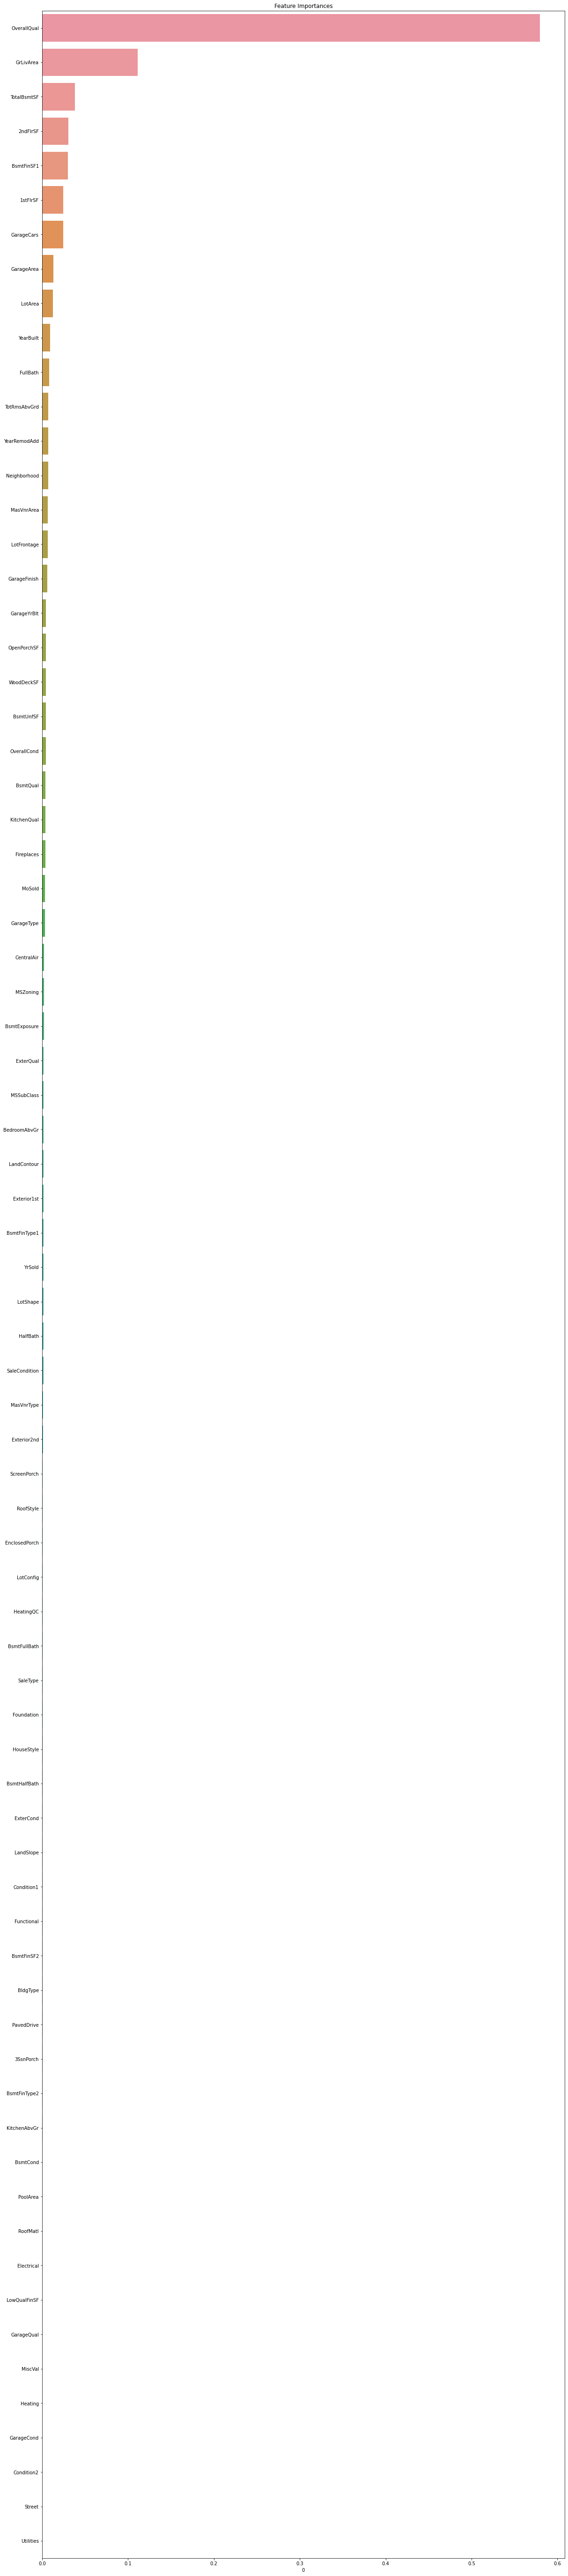

In [19]:
feature_importances_2 = feature_importances.sort_values(by=0, ascending=False) # sort by descending importance according to rfr

fig, ax = plt.subplots(figsize=(20,100))
sns.barplot(x=0, y=feature_importances_2.index, data=feature_importances_2, ax=ax)
plt.title('Feature Importances')
plt.show()

In [20]:
from sklearn.base import clone

def drop_col_importance(rf, X, y, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    #clone model to have the same specs
    clone_rf = clone(rf)
    #fit_model to data
    clone_rf.fit(X_train, y_train)
    benchmark = clone_rf.score(X_test, y_test) # result with all variables
    
    values = []
    for col in X.columns:
        X_temp = X_train.drop(col, axis=1) # df without current column
        clone_rf = clone(rf)
        clone_rf.fit(X_temp, y_train) # fit without current column (from x_train)
        values.append((col, benchmark-clone_rf.score(X_test.drop(col,axis=1), y_test))) # scores with data from x_test and y_test 
        # stores difference in scores between having all columns and missing each one (how good for the model it would be not to have each feature)
    
    return values

c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have

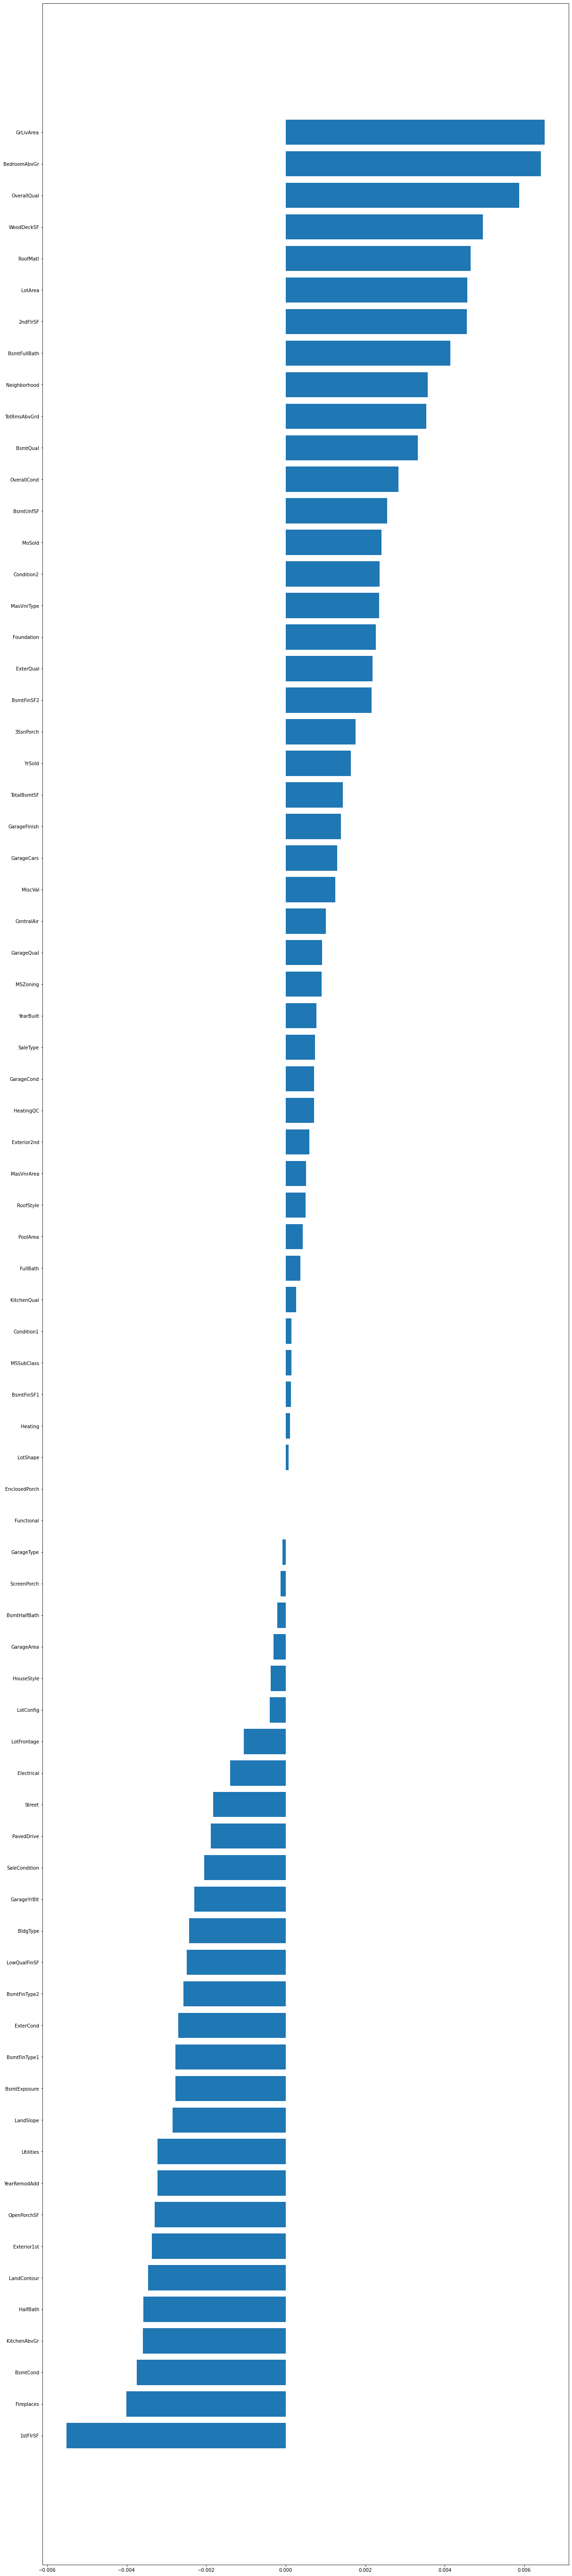

In [21]:
vals =  drop_col_importance(rf, rf_vars, rf_outcome)
sorted_vals = sorted(vals, key = lambda x: x[1])

plt.figure(figsize=(20,100))
plt.barh(range(len(sorted_vals)), [val[1] for val in sorted_vals], align='center')
plt.yticks(range(len(sorted_vals)), [val[0] for val in sorted_vals])
plt.show()

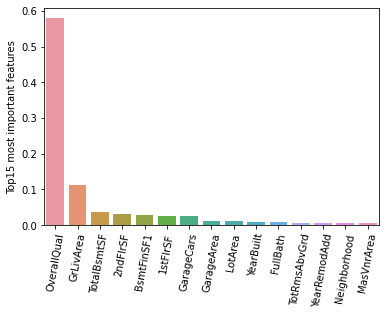

In [22]:
#plot most important features
most_important = feature_importances.sort_values(by=0, ascending=False).iloc[:15,:]
sns.barplot(x=most_important.index, y=0, data=most_important)
plt.xticks(rotation=80)
plt.ylabel('Top15 most important features')
plt.show()

Text(0, 0.5, 'Top15 less important features')

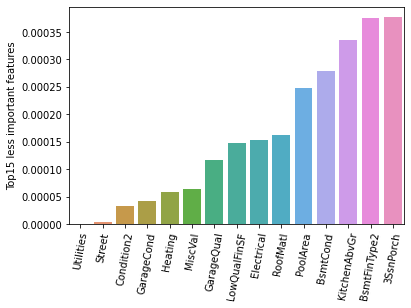

In [23]:
#plot less important features
less_important = feature_importances.sort_values(by=0).iloc[:15,:]
sns.barplot(x=less_important.index, y=0, data=less_important)
plt.xticks(rotation=80)
plt.ylabel('Top15 less important features')

In [24]:
cols_to_drop = [val[0] for val in vals if val[1] > 0] 
final_vars = df_vars.drop(cols_to_drop, axis=1)

In [25]:
cat_cols = []
num_cols = []

for col in final_vars.columns:
    if final_vars[col].dtype == "int64" or final_vars[col].dtype == "float64":
        num_cols.append(col)
    else:
        cat_cols.append(col)

# Building a Global Encoder

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy="most_frequent")), ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])
preprocess_pipeline = ColumnTransformer([('num', MyImputer(num_cols), num_cols), ('cat', cat_pipeline, cat_cols)])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_vars.loc[df_vars.index<1461], df_outcome.loc[df_outcome.index<1461], test_size=0.2, random_state=42)
# REMEMBER: we're splitting the original "train" dataset (first 1460 rows) into a new "train" dataset (80% of those 1460 rows) and a new "test" dataset (20%)

In [32]:
from sklearn.model_selection import GridSearchCV 

n_estimators_range = np.arange(start=5, stop=400, step=50)
max_features_range = np.arange(start=1, stop=5)
rfr = RandomForestRegressor(random_state=42)

pipe_base = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('forest', rfr)
])

pipe_base_params = [{'forest__n_estimators': n_estimators_range, 
                     'forest__max_features': max_features_range}]

gscv = GridSearchCV(pipe_base, pipe_base_params, cv=5)
gscv.fit(X_train, y_train) # finds best values (weights) for our estimator, using our preprocessing pipeline and a rfr
pipe_base = gscv.best_estimator_

c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have

In [33]:
gscv.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  ['MSSubClass', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '2ndFlrSF', 'GrLivArea',
                                                   'BsmtFullBath', 'FullBath',
                                                   'BedroomAbvGr',
                                                   'TotRmsAbvGrd', 'GarageCars',
                                                   'WoodDeckSF',
                                                   'Encl...
                                                                                  unknow

In [34]:
gscv.score(X_train, y_train) #Really bad overfitting problem

c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.9784273621421481

In [35]:
gscv.score(X_test, y_test)

c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.8768211004492279

In [36]:
gscv.fit(df_vars.loc[df_vars.index<1461], df_outcome.loc[df_outcome.index<1461]) # Now we train it with ALL of the original training data

c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         ['MSSubClass',
                                                                          'LotArea',
                                                                          'OverallQual',
                                                                          'OverallCond',
                                                                          'YearBuilt',
                                                                          'MasVnrArea',
                                                                          'BsmtFinSF1',
                                                                          'BsmtFinSF2',
                                                                          'BsmtUnfSF',
                                                       

In [43]:
gscv.score(X_train, y_train)

c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0.9797037325989016

In [37]:
df_vars.loc[df_vars.index==2121] = df_vars.loc[df_vars.index==2121].fillna(df_vars.mean()) # fills NA values from specific row with mean for some reason

C:\Users\pantu\AppData\Local\Temp\ipykernel_3824\132911029.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_vars.loc[df_vars.index==2121] = df_vars.loc[df_vars.index==2121].fillna(df_vars.mean())


In [38]:
results = gscv.predict(df_vars.loc[df_vars.index>=1461]) # use model on test data

c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\pantu\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [39]:
df_test.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [40]:
results = pd.DataFrame(results, columns=['SalePrice'], index=df_test.index)

In [41]:
results.head()

,SalePrice
Id,
1461,127115.096774
1462,164560.000000
1463,179510.477419
1464,187646.225806
1465,197603.800000


In [42]:
results.to_csv('submission.csv')